In [1]:
import torch
from diffusers import FluxPipeline

In [2]:
path = "pretrained_models/FLUX.1-dev"
pipe = FluxPipeline.from_pretrained(path, torch_dtype=torch.bfloat16)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [13]:
prompt = "A cat holding a sign that says hello world in pixel style"
image = pipe(prompt, width=512, height=512, num_inference_steps=4, guidance_scale=0.0).images[0]

  0%|          | 0/4 [00:00<?, ?it/s]

In [14]:
print(image)

<PIL.Image.Image image mode=RGB size=512x512 at 0x752CC1EAE390>


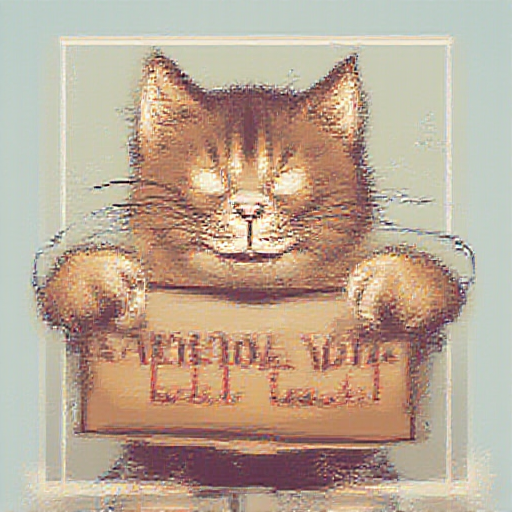

In [15]:
from IPython.display import display
display(image)